In [1]:
import nltk                                  # Python library for NLP
from nltk.corpus import twitter_samples      # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt              # visualization library
import numpy as np   

In [9]:
# download the stopwords for the process_tweet function
nltk.download('stopwords')

# import our convenience functions
from utils import process_tweet, build_freqs

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/surajkarki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# select the lists of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# concatenate the lists, 1st part is the positive tweets followed by the negative
tweets = all_positive_tweets + all_negative_tweets

# let's see how many tweets we have
print("Number of tweets: ", len(tweets))

Number of tweets:  10000


In [4]:
# make a numpy array representing labels of the tweets
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))

In [8]:
type

list

In [10]:
# create frequency dictionary
freqs = build_freqs(tweets, labels)

# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 13067


In [17]:
print(freqs)

psha', 0.0): 1, ('nia', 0.0): 1, ('strap', 0.0): 1, ('dz9055', 0.0): 1, ('entlead', 0.0): 1, ('590', 0.0): 1, ('twice', 0.0): 5, ('07:02', 0.0): 1, ('ifsc', 0.0): 1, ('mayor', 0.0): 1, ('biodivers', 0.0): 1, ('taxonom', 0.0): 1, ('collabor', 0.0): 1, ('speci', 0.0): 1, ('discoveri', 0.0): 1, ('collar', 0.0): 1, ('3:03', 0.0): 1, ('belt', 0.0): 1, ('smith', 0.0): 2, ('eyelin', 0.0): 1, ('therefor', 0.0): 1, ('netherland', 0.0): 1, ('el', 0.0): 1, ('jeb', 0.0): 1, ('blacklivesmatt', 0.0): 1, ('slogan', 0.0): 1, ('msnbc', 0.0): 1, ('jebbush', 0.0): 1, ('famish', 0.0): 1, ('marino', 0.0): 1, ('qualifi', 0.0): 2, ('suzi', 0.0): 1, ('skirt', 0.0): 1, ('tama', 0.0): 1, ('warrior', 0.0): 2, ('wound', 0.0): 1, ('iraq', 0.0): 1, ('be', 0.0): 2, ('camara', 0.0): 1, ('coveral', 0.0): 1, ('happili', 0.0): 1, ('sneezi', 0.0): 1, ('rogerwatch', 0.0): 1, ('stalker', 0.0): 1, ('velvet', 0.0): 1, ('tradit', 0.0): 1, ("people'", 0.0): 1, ('beheaviour', 0.0): 1, ("robert'", 0.0): 1, ('.\n.', 0.0): 2, ('aa

In [12]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:
    
    # initialize positive and negative counts
    pos = 0
    neg = 0
    
    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    # append the word counts to the table
    data.append([word, pos, neg])
    

In [13]:
data

[['happi', 211, 25],
 ['merri', 1, 0],
 ['nice', 98, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3568, 2],
 [':(', 1, 4571],
 ['😒', 1, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 2, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 26, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

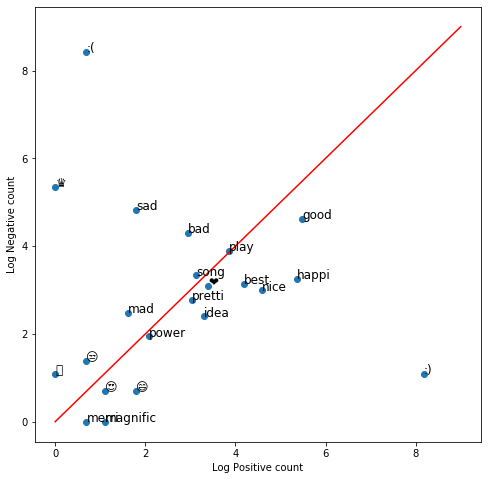

In [14]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()